# **Prediksi Penyakit Jantung**

## **Latar Belakang**

Penyakit jantung merupakan salah satu penyebab utama kematian di seluruh dunia, termasuk di Indonesia. Menurut data dari Organisasi Kesehatan Dunia (WHO), sekitar 17,9 juta orang meninggal setiap tahunnya karena penyakit kardiovaskular, yang mencakup sekitar 31% dari total kematian global. Di Indonesia sendiri, data dari Kementerian Kesehatan menunjukkan bahwa penyakit jantung koroner menempati urutan pertama dalam penyebab kematian pada usia dewasa. Penyebab umum penyakit jantung meliputi tekanan darah tinggi, kadar kolesterol yang tinggi, kebiasaan merokok, serta faktor genetika.

Pengembangan model prediksi penyakit jantung menjadi sangat penting sebagai alat yang dapat membantu klinisi dan masyarakat umum untuk mendeteksi risiko penyakit ini sejak dini. Model ini dapat berperan penting dalam mendukung upaya preventif, membantu mengurangi angka kejadian penyakit jantung, serta menurunkan biaya perawatan kesehatan jangka panjang.

## **Mengapa dan Bagaimana Masalah Ini Harus Diselesaikan**

**Mengapa masalah ini penting untuk diselesaikan:**
* Penyakit jantung merupakan penyebab utama kematian di seluruh dunia, sehingga
deteksi dini dapat mengurangi angka mortalitas.
* Dengan mengetahui risiko secara dini, pasien dapat melakukan perubahan gaya hidup yang lebih sehat untuk mengurangi risiko penyakit.
* Model prediksi penyakit jantung dapat mendukung tenaga medis dalam mengambil keputusan klinis yang lebih informatif dan tepat sasaran.
* Penggunaan teknologi prediktif dalam kesehatan dapat mengurangi biaya perawatan jangka panjang karena masalah kesehatan dapat dicegah sebelum berkembang.

**Bagaimana masalah ini dapat diselesaikan:**
* Membangun model prediksi berbasis machine learning dengan memanfaatkan data kesehatan (misalnya usia, tekanan darah, kadar kolesterol, dan riwayat keluarga).
* Menggunakan algoritma seperti regresi logistik, pohon keputusan, atau jaringan saraf tiruan untuk mengidentifikasi pola risiko yang terkait dengan penyakit jantung.
* Mengimplementasikan model prediksi ini sebagai alat bantu di klinik atau aplikasi kesehatan, sehingga masyarakat umum bisa memantau risiko kesehatan jantung secara mandiri.
* Menyediakan model dengan antarmuka yang mudah digunakan agar tenaga kesehatan dan pengguna awam dapat dengan mudah memahami dan menggunakan hasil prediksi.

## **Hasil Riset dan Referensi Terkait**

Beberapa penelitian yang telah dilakukan sebelumnya menunjukkan keberhasilan model machine learning dalam memprediksi risiko penyakit jantung. Beberapa referensi yang bisa menjadi acuan adalah sebagai berikut:

* Rajkumar, A., & Hariharan, M. (2020). Prediction of Heart Disease using Machine Learning Algorithms. International Journal of Research in Engineering and Technology.

* Chaurasia, V., & Pal, S. (2014). Data Mining Approach to Detect Heart Diseases. International Journal of Advanced Computer Science and Information Technology.

# **1. Import Library**

In [1]:
!pip install feature-engine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# **2. Data Loading**

### **Informasi Dataset**

In [3]:
dataset = pd.read_csv('Heart Attack.csv')
# Tampilkan informasi dasar
print("Jumlah Data:", dataset.shape[0])
print("Jumlah Fitur:", dataset.shape[1])
print("\nInformasi Data:")
print(dataset.info())

# Cek nilai yang hilang
print("\nJumlah Nilai Hilang per Kolom:")
print(dataset.isnull().sum())

Jumlah Data: 1319
Jumlah Fitur: 9

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None

Jumlah Nilai Hilang per Kolom:
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


## Jumlah Data dan Fitur
Dataset yang digunakan terdiri dari **1.319 entri** (data) dan **9 fitur**. Ini menunjukkan bahwa kita memiliki sejumlah data yang cukup untuk melakukan analisis dan pelatihan model machine learning.

## Ringkasan Data
Berdasarkan analisis awal, berikut adalah ringkasan informasi tentang dataset:

- **Total Entri**: 1.319
- **Fitur**: Terdiri dari 9 kolom, yang mencakup variabel input dan output.

| Nama Fitur      | Tipe Data | Deskripsi                                                                                       |
|------------------|-----------|-------------------------------------------------------------------------------------------------|
| `age`            | int64     | Usia individu dalam tahun.                                                                     |
| `gender`         | int64     | Kategori gender (0 untuk Perempuan, 1 untuk Laki-laki).                                        |
| `impluse`        | int64     | Detak jantung individu dalam denyut per menit (bpm).                                          |
| `pressurehight`  | int64     | Tekanan darah sistolik (mmHg) saat jantung memompa darah (nilai tekanan darah tertinggi).      |
| `pressurelow`    | int64     | Tekanan darah diastolik (mmHg) saat jantung beristirahat di antara denyutan (nilai terendah). |
| `glucose`        | float64   | Tingkat gula darah individu dalam mg/dL.                                                       |
| `kcm`            | float64   | Level Creatine Kinase-MB dalam ng/mL, enzim jantung sebagai indikator kerusakan otot jantung. |
| `troponin`       | float64   | Level Troponin dalam ng/mL, protein jantung yang meningkat saat ada kerusakan pada otot jantung. |
| `class`          | object    | Kategori hasil diagnosis: Negative (tidak ada serangan jantung, kelas 0) dan Positive (ada serangan jantung, kelas 1). |

## Kondisi Data
Berdasarkan analisis, tidak ditemukan nilai hilang pada setiap kolom dalam dataset. Berikut adalah jumlah nilai hilang per kolom:

| Fitur            | Jumlah Nilai Hilang |
|------------------|---------------------|
| `age`            | 0                   |
| `gender`         | 0                   |
| `impluse`        | 0                   |
| `pressurehight`  | 0                   |
| `pressurelow`    | 0                   |
| `glucose`        | 0                   |
| `kcm`            | 0                   |
| `troponin`       | 0                   |
| `class`          | 0                   |

Ini menunjukkan bahwa dataset dalam kondisi baik dan siap untuk diproses lebih lanjut tanpa perlu melakukan penanganan nilai hilang.

## Memori yang Digunakan
Dataset ini menggunakan memori sekitar **92.9 KB**, yang tergolong kecil dan efisien untuk diproses dalam analisis lebih lanjut.


# **3. Data Cleaning**

### **Menghilangkan Nilai NULL**

In [4]:
input_columns = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

# Loop untuk mengecek nilai null di setiap variabel
for column in input_columns:
    null_count = dataset[column].isnull().sum()
    if null_count > 0:
        print(f"'{column}' contains {null_count} null values.")
    else:
        print(f"'{column}' does not contain any null values.")

'age' does not contain any null values.
'gender' does not contain any null values.
'impluse' does not contain any null values.
'pressurehight' does not contain any null values.
'pressurelow' does not contain any null values.
'glucose' does not contain any null values.
'kcm' does not contain any null values.
'troponin' does not contain any null values.


Karena tidak ada nilai null atau 0 di dalam dataset, maka kita lanjut ke tahap selanjutnya

# **4. Data Exploration**

## **Encoding Label Target dan Distribusi Kelas**

Melakukan encoding secara manual pada kelas target (`class`) dengan mengganti `posittive` dengan angka 1 dan `negative` dengan angka 0

class
1    810
0    509
Name: count, dtype: int64


<ipython-input-5-0082d387eae6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['class'] = dataset['class'].replace({'positive': 1, 'negative': 0})


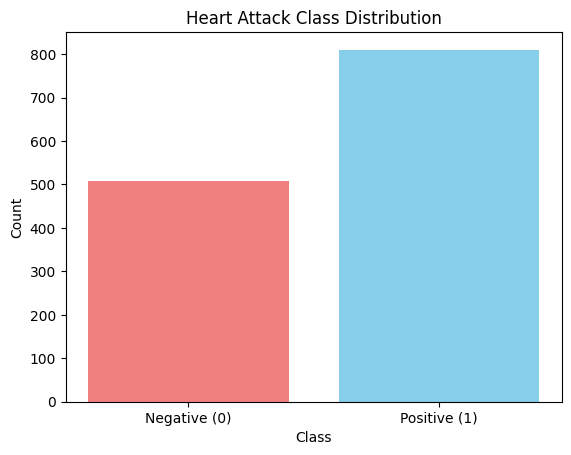

In [5]:
dataset['class'] = dataset['class'].replace({'positive': 1, 'negative': 0})

# Mengecek hasil perubahan
print(dataset['class'].value_counts())

class_counts = dataset['class'].value_counts()

# Plot
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Heart Attack Class Distribution')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])  # Labeling classes
plt.show()

**KESIMPULAN**: Dari diagram tersebut kita tahu bahwa target yang di prediksi tidak seimbang jumlahnya.

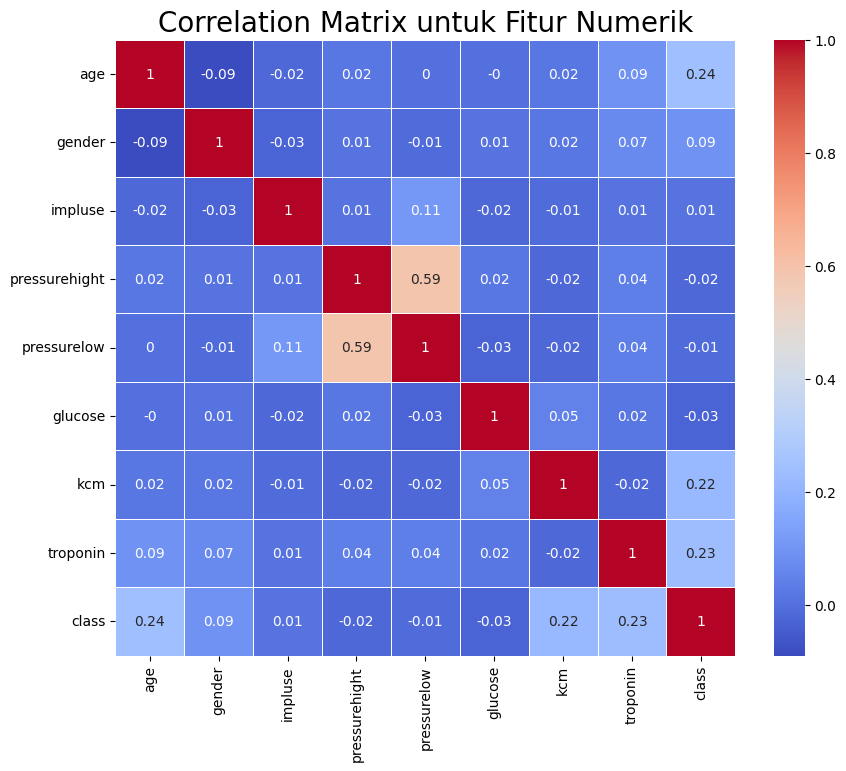

In [6]:
# Hitung matriks korelasi
correlation_matrix = dataset.corr().round(2)

# Visualisasikan matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

**KESIMPULAN** :
* Korelasi **paling rendah** terhadap kolom `class` ada pada kolom `pressurelow` dan `impluse`
* Korelaasi **paling kuat** terhadap kolom `class` ada pada kolom `age`, `kcm`, dan `troponin`

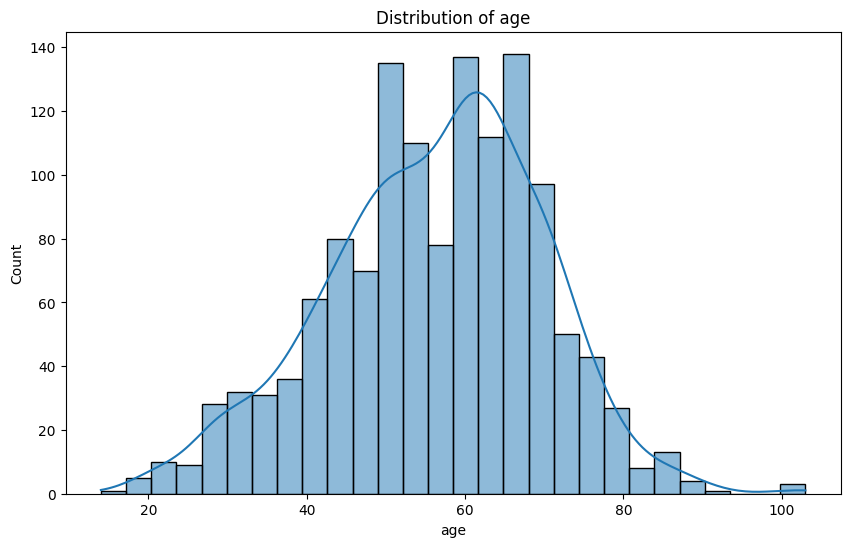

Skewness of age: -0.23921873824246861


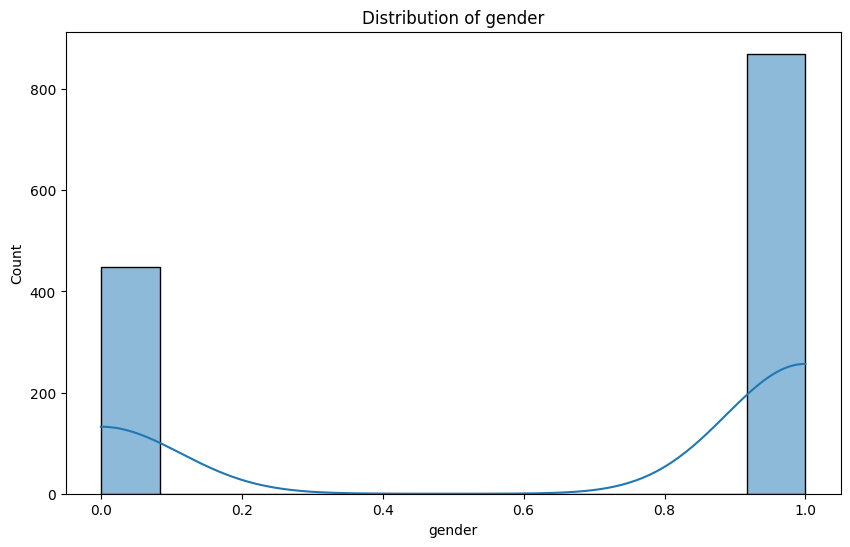

Skewness of gender: -0.6743628337800194


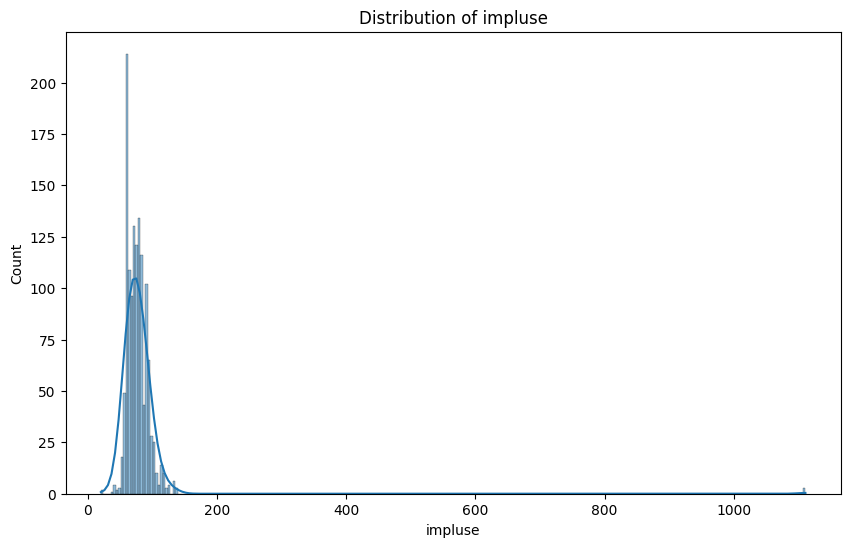

Skewness of impluse: 18.24771989662879


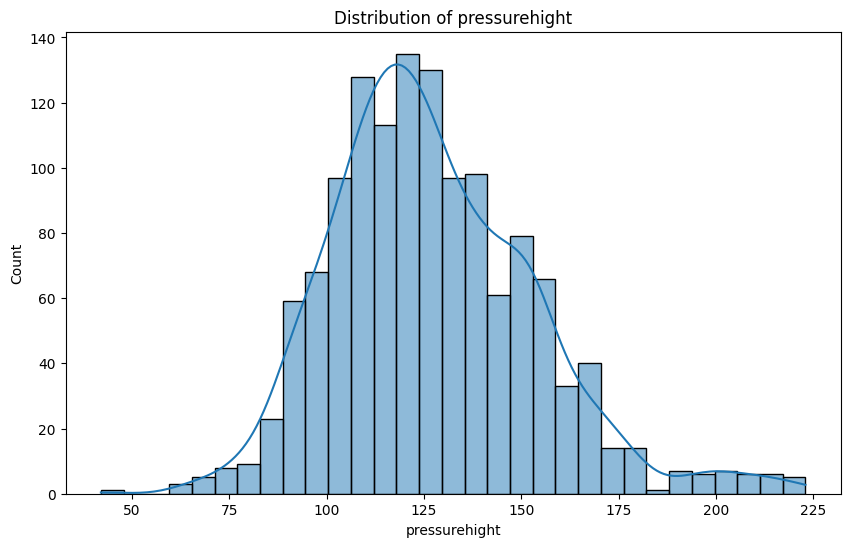

Skewness of pressurehight: 0.6852460958110306


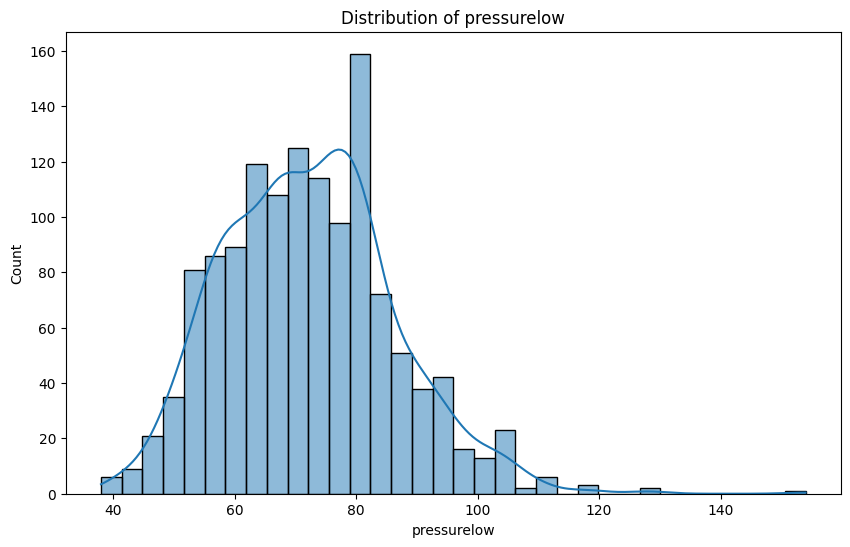

Skewness of pressurelow: 0.48920228416877803


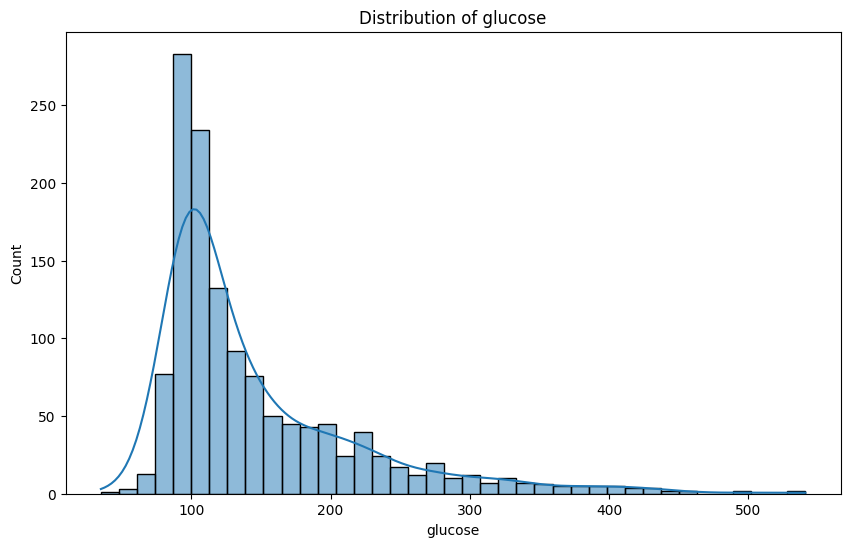

Skewness of glucose: 1.933474909905609


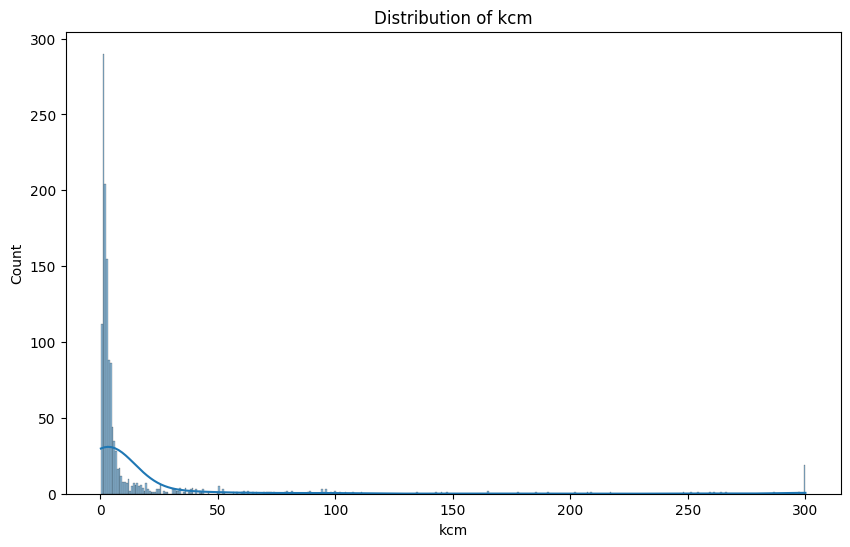

Skewness of kcm: 4.978095271058858


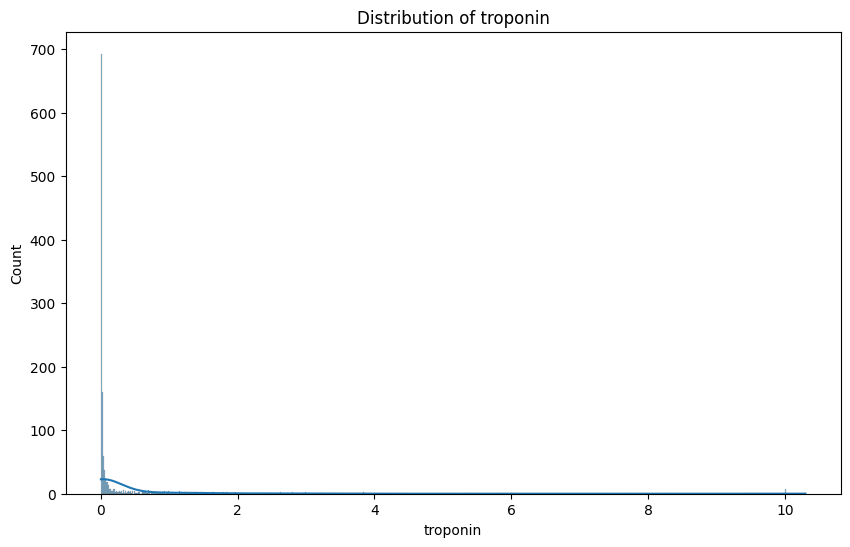

Skewness of troponin: 5.799106921990377


In [7]:
# Menghitung skewness dan membuat diagram distribusi
for col in input_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')

    plt.show()

    skewness = dataset[col].skew()
    print(f'Skewness of {col}: {skewness}')

NOTE:
Kolom yang memiliki distribusi Normal : `age`, `gender`, `pressurehight`, `pressurelow`.

Kolom yang memiliki distribusi skewed : `impulse`, `glucose`, `kcm`, `troponin`

Skewness of age: -0.23921873824246861


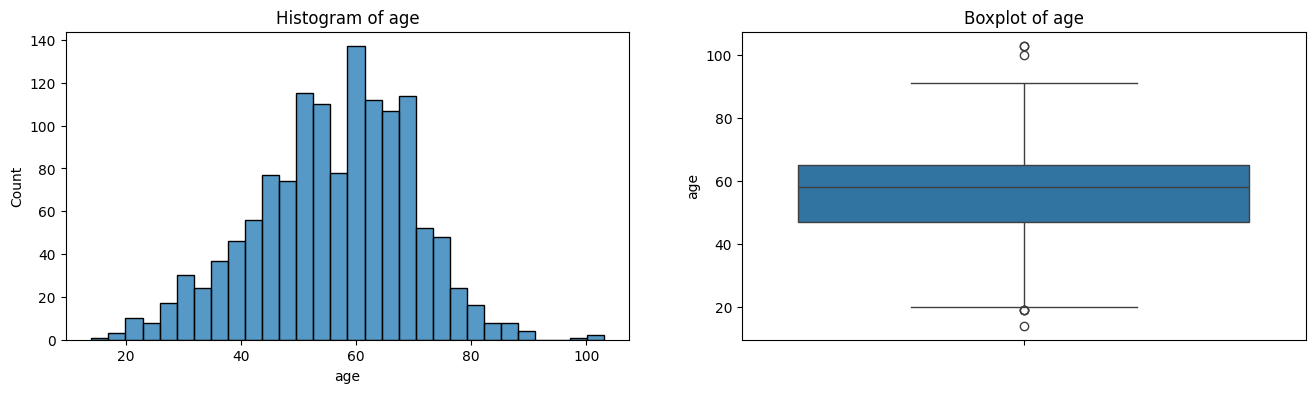

Skewness of gender: -0.6743628337800194


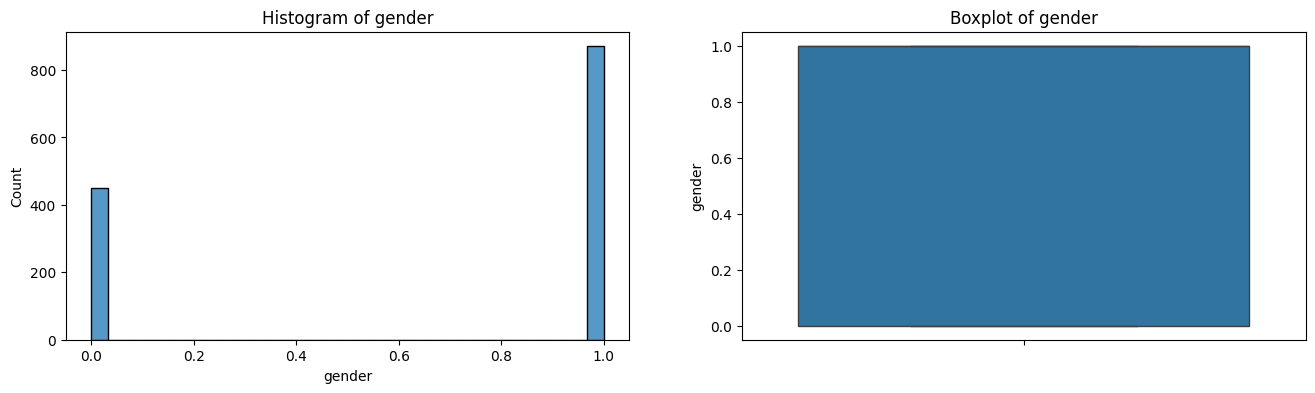

Skewness of impluse: 18.24771989662879


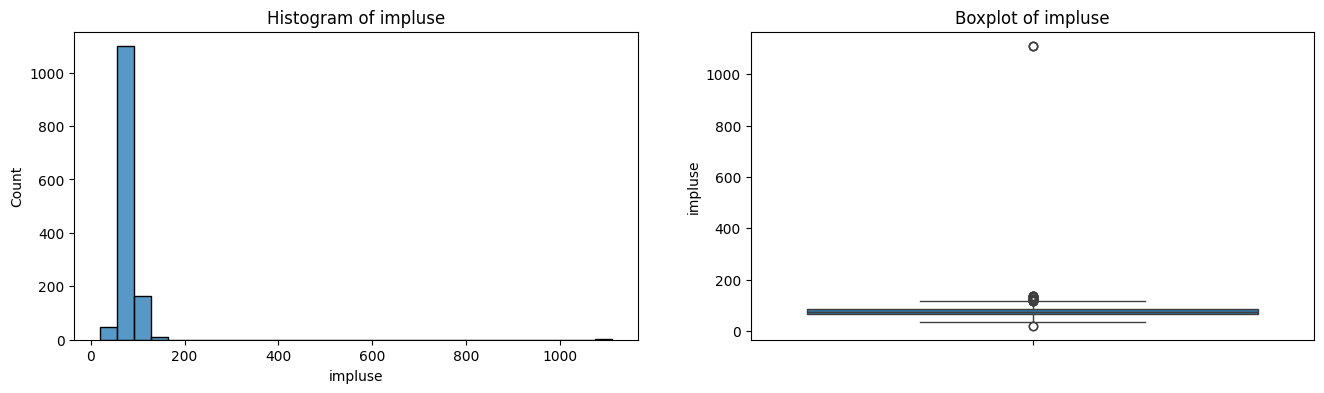

Skewness of pressurehight: 0.6852460958110306


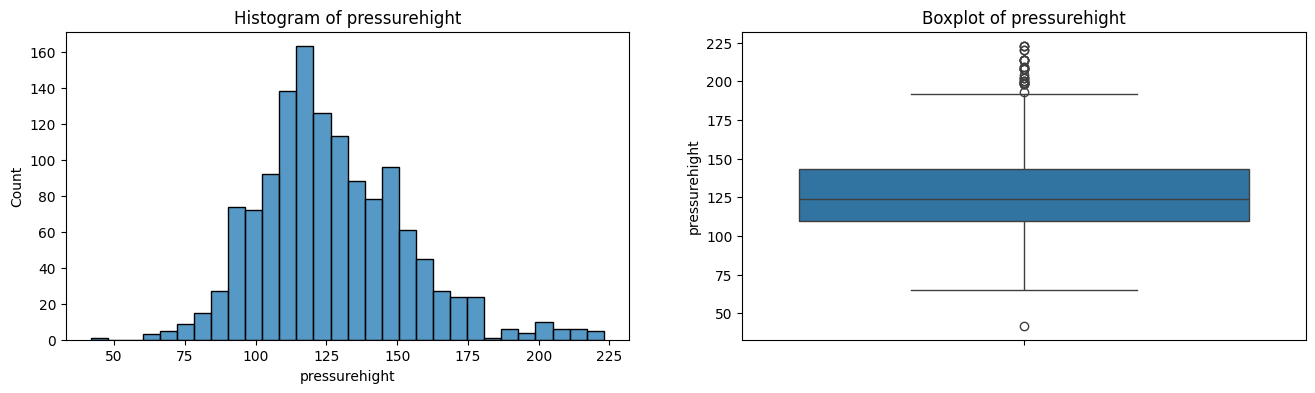

Skewness of pressurelow: 0.48920228416877803


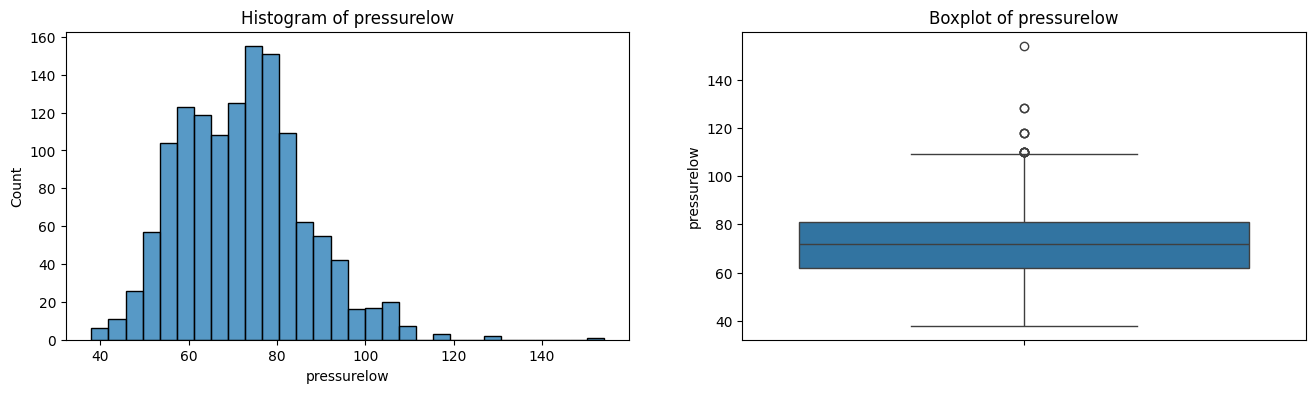

Skewness of glucose: 1.933474909905609


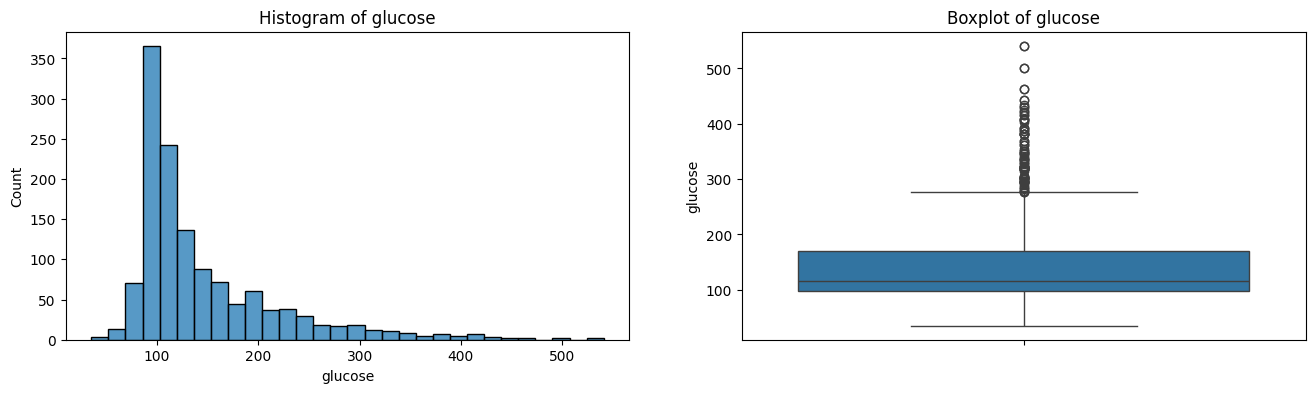

Skewness of kcm: 4.978095271058858


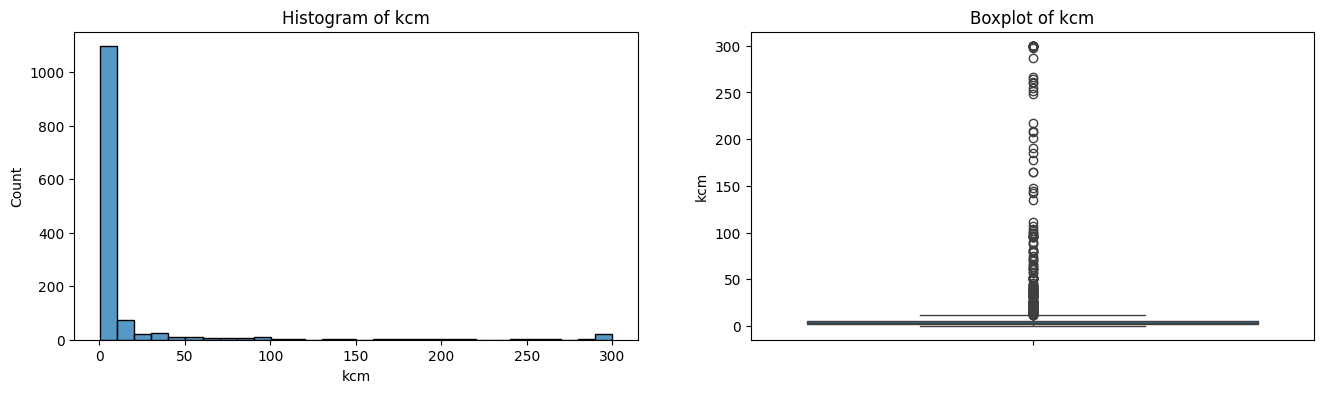

Skewness of troponin: 5.799106921990377


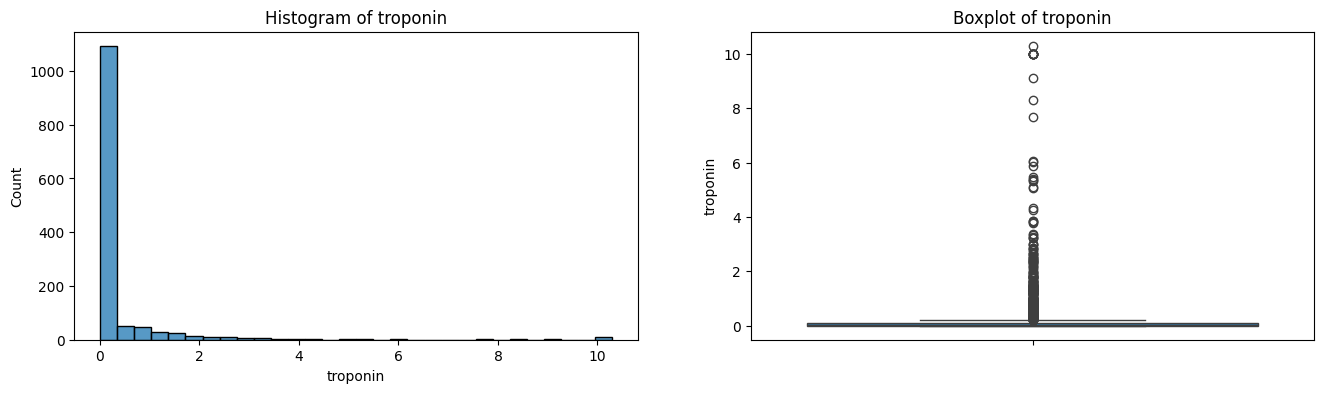

In [8]:
# Menghitung skewness dan membuat diagram distribusi
for col in input_columns:
    skewness = dataset[col].skew()
    print(f'Skewness of {col}: {skewness}')

    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[col], bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

### **Kesimpulan :**

* Semua kolom memiliki outlier kecuali kolom `gender`

* Kolom yang memiliki distribusi Normal : `age`, `gender`, `pressurehight`, `pressurelow`.

* Kolom yang memiliki distribusi skewed : `impulse`, `glucose`, `kcm`, `troponin`

# **5. Data Pre-Processing**

## **Outlier Handling**

1. **Inisialisasi Winsorizer untuk Distribusi Gaussian:**

- `handling_outlier_gaussian`: Menggunakan Winsorizer dengan metode distribusi gaussian untuk beberapa kolom numerik tertentu.
- `fold=3`: Menerapkan Winsorizing dengan menggantikan nilai outlier yang melebihi batas tiga kali deviasi standar.
2. **Handling Outlier dengan Distribusi Gaussian:**

- Proses handling outlier dengan menggunakan Winsorizer pada distribusi gaussian.
- Membuat boxplot sebelum dan setelah handling outlier untuk kolom `pressurehight` sebagai contoh.
3. **Inisialisasi Winsorizer untuk Distribusi IQR:**

- `handling_outlier_skewed`: Menggunakan Winsorizer dengan metode distribusi IQR (Interquartile Range) untuk beberapa kolom numerik tertentu.
4. **Handling Outlier dengan Distribusi IQR:**

- Proses handling outlier dengan menggunakan Winsorizer pada distribusi IQR.

- Membuat boxplot sebelum dan setelah handling outlier untuk kolom 'Rainfall' sebagai contoh.

In [9]:
# Initialize Winsorizer for gaussian distribution
handling_outlier_gaussian = Winsorizer(capping_method='gaussian', # choose gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=3,
                          variables=['age', 'pressurehight', 'pressurelow'])

In [10]:
# perform outlier handling
handling_outlier_gaussian.fit(dataset)

dataset_ho = handling_outlier_gaussian.transform(dataset)

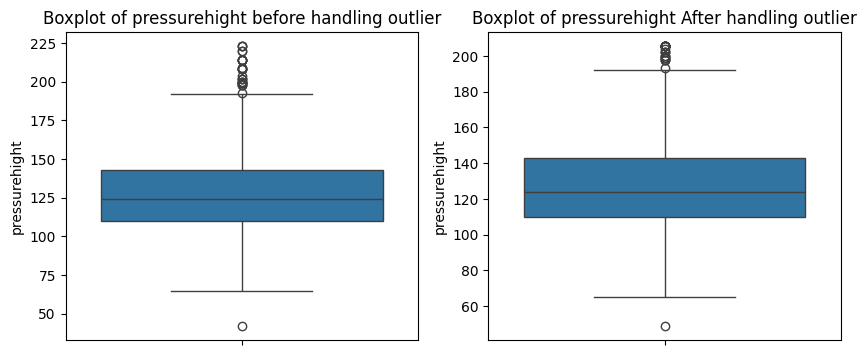

In [11]:
# Visualisasi Boxplot sebelum dan sesudah handling outlier
plt.figure(figsize=(10, 4))

# Boxplot MinTemp
plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['pressurehight'])
plt.title('Boxplot of pressurehight before handling outlier')

# Boxplot Rainfall
plt.subplot(1, 2, 2)
sns.boxplot(y=dataset_ho['pressurehight'])
plt.title('Boxplot of pressurehight After handling outlier')

plt.show()

In [12]:
# Initialize Winsorizer for gaussian distribution
handling_outlier_skewed = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries
                          tail='both', # cap left, right or both tails
                          fold=3,
                          variables=['impluse', 'glucose', 'kcm', 'troponin'])

In [13]:
# perform outlier handling
handling_outlier_skewed.fit(dataset_ho)

dataset_ho = handling_outlier_skewed.transform(dataset_ho)

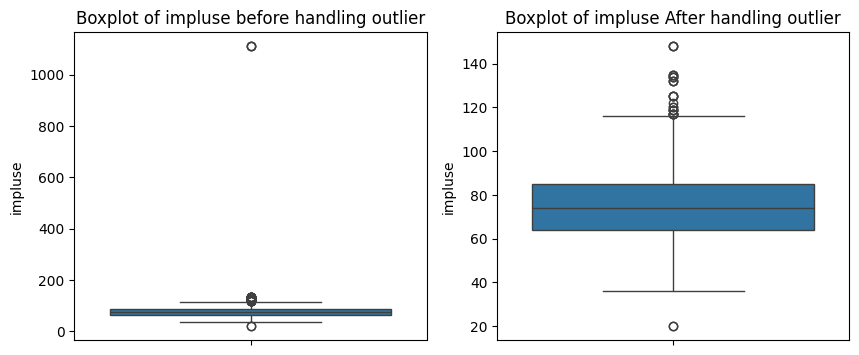

In [14]:
plt.figure(figsize=(10, 4))

# Boxplot MinTemp
plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['impluse'])
plt.title('Boxplot of impluse before handling outlier')

# Boxplot Rainfall
plt.subplot(1, 2, 2)
sns.boxplot(y=dataset_ho['impluse'])
plt.title('Boxplot of impluse After handling outlier')

plt.show()

**KESIMPULAN** : Setelah handling outliernya, dataset menjadi lebih siap dan lebih baik

In [15]:
# Print data summaries, generate diagnostic plots, and calculate skewness
print('Dataframe - Before Capping')
print(dataset.describe())
print('')
print('Dataframe - After Capping')
print(dataset_ho.describe())

Dataframe - Before Capping
               age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.191812     0.659591    78.336619     127.170584    72.269143   
std      13.647315     0.474027    51.630270      26.122720    14.033924   
min      14.000000     0.000000    20.000000      42.000000    38.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
max     103.000000     1.000000  1111.000000     223.000000   154.000000   

           glucose          kcm     troponin        class  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean    146.634344    15.274306     0.360942     0.614102  
std      74.923045    46.327083     1.154568     0.486991  
min      35.000000     0.321000     0.001000    

## **Normalization**

1. **Definisi Feature Matrix dan Target Variable:**

- `feature = dataset_ho.drop(columns='class')`: Mengambil seluruh kolom kecuali 'RainTomorrow' sebagai feature matrix.
- `target = dataset_ho['class']`: Mengambil kolom 'RainTomorrow' sebagai target variable.
2. **Inisialisasi dan Scaling Data menggunakan RobustScaler:**

- `feature_scalar = RobustScaler()`: Inisialisasi objek RobustScaler untuk melakukan scaling data.
3. **Melakukan Scaling pada Data Fitur:**

- `feature_scalar.fit(feature)`: Melakukan fitting pada data fitur untuk menghitung median dan IQR.
- `scaled_feature = feature_scalar.transform(feature)`: Melakukan scaling pada data fitur menggunakan RobustScaler.
4. **Konversi Hasil Scaling Menjadi DataFrame:**

- `feature = pd.DataFrame(scaled_fiture, columns=fiture.columns)`: Mengonversi hasil scaling menjadi DataFrame dengan nama kolom yang sesuai.

In [16]:
dataset_ho.sample(5)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
208,49.0,0,67,120.0,55.0,100.0,0.676,0.005,1
992,72.0,0,64,112.0,65.0,109.0,1.320,0.076,1
369,78.0,1,59,113.0,65.0,80.0,2.650,0.324,1
483,70.0,0,91,147.0,65.0,86.0,1.540,0.020,1
22,52.0,1,76,109.0,85.0,227.0,0.665,0.324,1


In [17]:
# define the feature matrix X and the target variable y
feature = dataset_ho.drop(columns='class')
target = dataset_ho['class']

In [18]:
# Initialize the Robust Scaler
feature_scalar = RobustScaler()

# Scale the Data
feature_scalar.fit(feature)

RobustScaler()

In [19]:
# Melakukan scaling pada data fiture
scaled_feature = feature_scalar.transform(feature)

In [20]:
# Convert to DataFrame
feature = pd.DataFrame(scaled_feature, columns=feature.columns)

In [21]:
# Menampilkan 5 baris pertama dari dataset yang sudah di-scaled
feature.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,0.333333,0.0,-0.380952,1.090909,0.578947,0.615385,-0.253012,-0.025157
1,-2.055556,0.0,0.952381,-0.787879,-1.368421,2.517483,0.939759,3.899371
2,-0.166667,0.0,-0.476190,1.090909,0.263158,2.153846,-0.207229,-0.138365
3,0.333333,0.0,-0.190476,-0.121212,-0.894737,2.153846,2.655422,1.358491
4,-0.166667,0.0,-0.476190,-0.363636,-0.368421,2.573427,-0.426506,-0.138365


## **Data Splitting + SMOTE**

**Penjelasan Kode:**

- **Membagi Data:**
  - Fungsi `train_test_split` dari modul `sklearn.model_selection` digunakan untuk melakukan pembagian data. Fungsi ini memiliki parameter sebagai berikut:
    - `feature`: Matriks fitur.
    - `target`: Variabel target.
    - `test_size`: Proporsi data yang dialokasikan untuk set pengujian. Dalam kasus ini, diatur menjadi 20% (0,2).
    - `random_state`: Seed untuk generator angka acak untuk memastikan reproduktibilitas.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

- **Output:**
  - Hasil dari pembagian data adalah empat set data:
    - `X_train`: Matriks fitur untuk set pelatihan.
    - `X_test`: Matriks fitur untuk set pengujian.
    - `y_train`: Variabel target untuk set pelatihan.
    - `y_test`: Variabel target untuk set pengujian.

**Penjelasan Kode**

- `SMOTE(random_state=42):`
  - Kode ini menginisialisasi objek SMOTE dari pustaka imblearn, yang digunakan untuk menangani masalah kelas tidak seimbang dalam dataset.
  - Parameter `random_state` diatur untuk memastikan bahwa hasil yang diperoleh dari pengacakan dalam proses SMOTE dapat direproduksi. Dengan menggunakan nilai yang sama (misalnya, 42), Anda dapat mendapatkan hasil yang konsisten setiap kali kode dieksekusi. Ini berguna untuk debugging dan pengujian model.

In [ ]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

- `smote.fit_resample(X_train, y_train)`:
  - Metode `fit_resample()` digunakan untuk melakukan oversampling pada data pelatihan (`X_train` dan `y_train`). Proses ini akan menghasilkan dataset baru yang lebih seimbang antara kelas mayoritas dan kelas minoritas.
  - `X_train`: Ini adalah fitur input dari data pelatihan (misalnya, variabel seperti umur, jenis kelamin, tekanan darah, dll.).
  - `y_train`: Ini adalah target output dari data pelatihan yang menunjukkan kelas masing-masing contoh (misalnya, positif atau negatif untuk penyakit jantung).
  - Output: Fungsi ini mengembalikan dua variabel baru:
    - `X_train_resampled`: Fitur input yang telah di-oversample sehingga memiliki distribusi yang lebih seimbang antara kelas-kelas.
    - `y_train_resampled`: Target output yang juga telah di-oversample, dengan jumlah kelas positif dan negatif yang lebih seimbang.


In [ ]:
# Terapkan SMOTE untuk menyeimbangkan kelas pada data pelatihan
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## **Visualisai perbandingan sebelum dan setelah menggunakan SMOTE**

<ipython-input-28-ec47a688b1b6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=class_distribution_before, palette='Blues', alpha=0.7)
<ipython-input-28-ec47a688b1b6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=class_distribution_after, palette='Oranges', alpha=0.7)


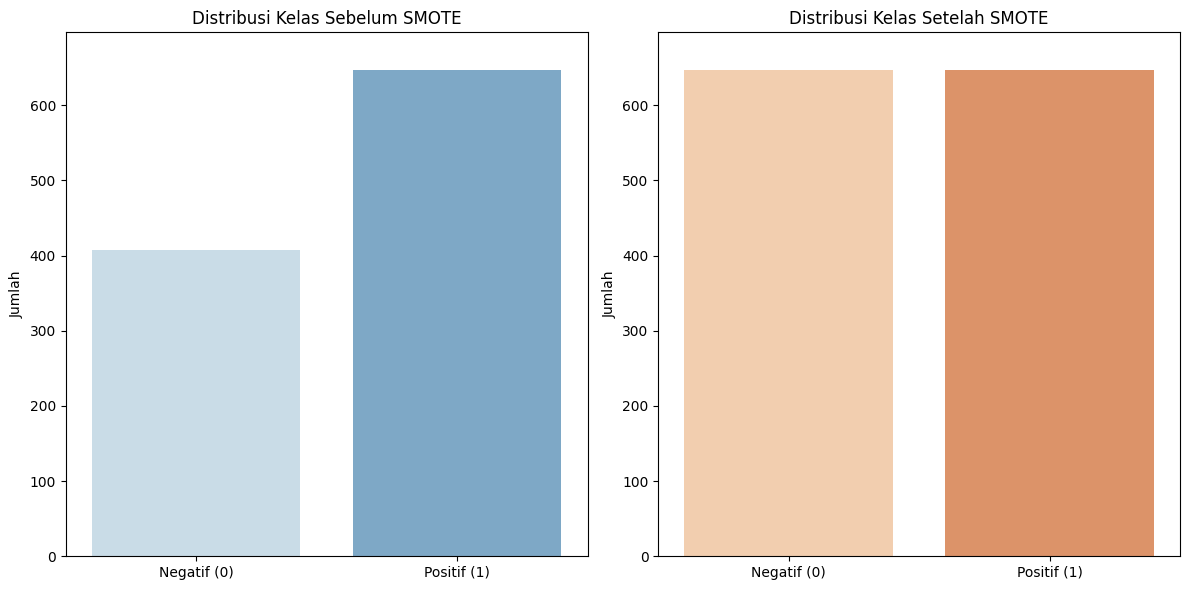

In [28]:
# Menghitung distribusi kelas sebelum SMOTE
class_distribution_before = np.bincount(y_train)
class_distribution_after = np.bincount(y_train_resampled)

# Menyiapkan data untuk visualisasi
labels = ['Negatif (0)', 'Positif (1)']
x = np.arange(len(labels))  # posisi pada sumbu x

# Plot
plt.figure(figsize=(12, 6))

# Distribusi kelas sebelum SMOTE
plt.subplot(1, 2, 1)
sns.barplot(x=x, y=class_distribution_before, palette='Blues', alpha=0.7)
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xticks(x, labels)
plt.ylabel('Jumlah')
plt.ylim(0, max(class_distribution_before) + 50)

# Distribusi kelas setelah SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=x, y=class_distribution_after, palette='Oranges', alpha=0.7)
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xticks(x, labels)
plt.ylabel('Jumlah')
plt.ylim(0, max(class_distribution_after) + 50)

# Menampilkan plot
plt.tight_layout()
plt.show()

### **Tujuan Penggunaan SMOTE**
- **Mengatasi Kelas Tidak Seimbang**: Dataset yang tidak seimbang, di mana satu kelas jauh lebih banyak dibandingkan kelas lain, dapat menyebabkan model machine learning bias dan tidak akurat. SMOTE membantu mengatasi masalah ini dengan menciptakan contoh baru untuk kelas minoritas, sehingga distribusi kelas menjadi lebih seimbang.
- **Meningkatkan Akurasi Model**: Dengan mengatasi ketidakseimbangan, model diharapkan dapat memberikan prediksi yang lebih baik, terutama pada kelas yang sebelumnya sulit untuk dikenali.

**Kesimpulan** : Setelah menggunakan SMOTE dataset menjadi seimbang

## **Modelling**

`accuracy_scores` digunakan untuk menyimpan hasil akurasi dari tiap model yang nantinya akan dilakukan perbandingan

In [ ]:
accuracy_scores = [] # menyimpan akurasi model untuk perbandingan

### **Random Forest**

### **Penjelasan Kode**
- `RandomForestClassifier(n_estimators=100, random_state=42):`
  - Kode ini menginisialisasi objek model Random Forest dari pustaka s`klearn.ensemble`.
  - `n_estimators=100`: Parameter ini menentukan jumlah pohon keputusan (decision trees) yang akan digunakan dalam hutan acak. Semakin banyak pohon yang digunakan, semakin baik model dalam menangkap kompleksitas data, tetapi juga dapat mempengaruhi waktu pelatihan dan prediksi.
  - `random_state=42`: Parameter ini digunakan untuk mengatur seed random generator sehingga hasil eksperimen dapat direproduksi. Menggunakan nilai yang sama (misalnya, 42) akan memberikan hasil yang konsisten setiap kali kode dieksekusi, yang berguna untuk debugging dan pengujian model.

In [ ]:
# Membangun Model Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Inisialisasi model

- `rf_model.fit(X_train_resampled, y_train_resampled):`
- Metode `fit()` digunakan untuk melatih model Random Forest dengan data pelatihan yang telah di-oversample (`X_train_resampled` dan `y_train_resampled`).
- `X_train_resampled`: Ini adalah fitur input dari data pelatihan yang telah di-oversample sehingga distribusi kelas menjadi lebih seimbang.
- `y_train_resampled`: Ini adalah target output dari data pelatihan yang juga telah di-oversample.
- Proses ini melibatkan membangun hutan acak dengan menciptakan banyak pohon keputusan dari data pelatihan, di mana setiap pohon dilatih pada subset acak dari data dan fitur.

In [ ]:
rf_model.fit(X_train_resampled, y_train_resampled)  # Melatih model

- `y_pred = rf_model.predict(X_test)`:
- Metode `predict()` digunakan untuk membuat prediksi berdasarkan data pengujian (`X_test`).
- `X_test`: Ini adalah fitur input dari data pengujian yang digunakan untuk mengukur kinerja model setelah dilatih.
- `y_pred`: Variabel ini menyimpan hasil prediksi dari model Random Forest untuk setiap contoh dalam data pengujian. Hasil ini adalah kelas yang diprediksi untuk setiap contoh, yaitu 0 (tidak ada serangan jantung) atau 1 (ada serangan jantung).

In [ ]:
# Membuat Prediksi
y_pred = rf_model.predict(X_test)  # Prediksi pada set pengujian

- `accuracy = accuracy_score(y_test, y_pred)`:
  - Kode ini digunakan untuk menghitung akurasi model pada data pengujian (`y_test`).
  - `y_test`: Ini adalah target output yang sebenarnya dari data pengujian (kelas asli).
  - `y_pred`: Ini adalah kelas yang diprediksi oleh model untuk data pengujian.
  - `accuracy_score`: Fungsi ini dari pustaka sklearn.metrics menghitung proporsi dari prediksi yang benar dibandingkan dengan total prediksi. Nilai akurasi berkisar antara 0 (tidak ada prediksi yang benar) hingga 1 (semua prediksi benar).
- `y_train_pred = rf_model.predict(X_train_resampled)`:
  - Kode ini digunakan untuk membuat prediksi pada data pelatihan yang telah di-oversample (`X_train_resampled`).
  - Dengan memanggil metode `predict()`, model Random Forest akan menghasilkan kelas yang diprediksi untuk setiap contoh dalam data pelatihan yang telah di-oversample.
  - `y_train_pred`: Variabel ini menyimpan hasil prediksi dari model untuk data pelatihan.
- `train_accuracy = accuracy_score(y_train_resampled, y_train_pred)`:
  - Kode ini digunakan untuk menghitung akurasi model pada data pelatihan yang telah di-oversample.
  - `y_train_resampled`: Ini adalah target output yang sebenarnya dari data pelatihan yang telah di-oversample.
  - `y_train_pred`: Ini adalah kelas yang diprediksi oleh model untuk data pelatihan.
  - Fungsi accuracy_score digunakan kembali untuk menghitung proporsi prediksi yang benar untuk data pelatihan.

Train Set Accuracy: 1.0000
Test Set Accuracy: 0.9773
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.97      0.98       264
weighted avg       0.98      0.98      0.98       264



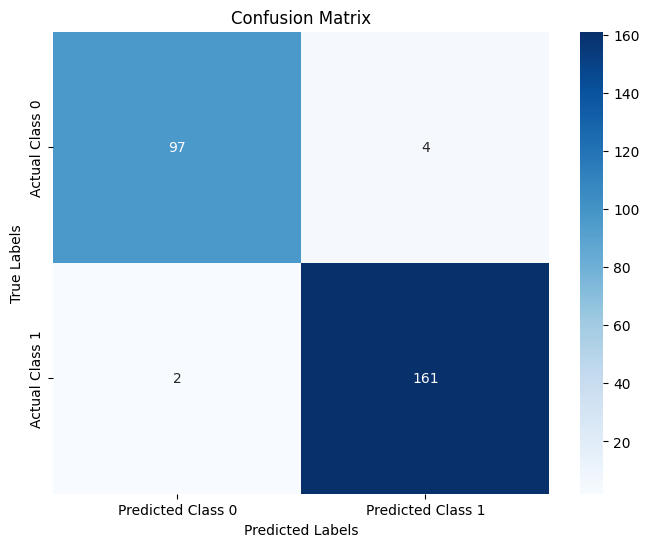

In [23]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
y_train_pred = rf_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
accuracy_scores.append(accuracy)
print(f"Train Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Class 0", "Predicted Class 1"],
            yticklabels=["Actual Class 0", "Actual Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### **SVM**

### **Penjelasan Kode**
- `svm_model = SVC(kernel='linear', C=1)`:
  - Kode ini digunakan untuk menginisialisasi model SVM menggunakan kelas SVC dari pustaka sklearn.svm.
  - `kernel='linear'`: Menunjukkan bahwa fungsi kernel yang digunakan adalah kernel linear. Kernel linear digunakan ketika data dapat dipisahkan secara linear, dan ini memungkinkan model untuk mencari hyperplane yang memisahkan dua kelas dalam ruang fitur.
  - `C=1`: Parameter `C` mengontrol keseimbangan antara memaksimalkan margin (jarak antara hyperplane dan titik data terdekat) dan meminimalkan kesalahan klasifikasi. Nilai `C` yang lebih rendah cenderung menghasilkan margin yang lebih besar tetapi mungkin mengorbankan beberapa kesalahan, sedangkan nilai `C` yang lebih tinggi akan lebih toleran terhadap kesalahan klasifikasi untuk mencapai margin yang lebih kecil.

In [ ]:
# Buat model SVM dengan parameter umum
svm_model = SVC(kernel='linear', C=1)  # Kernel RBF, C=1 (default), gamma='scale' (default)

- `svm_model.fit(X_train_resampled, y_train_resampled)`:
- Kode ini digunakan untuk melatih model SVM menggunakan data pelatihan yang telah di-oversample (`X_train_resampled`) dan target yang sesuai (`y_train_resampled`).
- Metode `fit()` melakukan proses pelatihan, di mana model akan mencari pola dalam data untuk memisahkan kelas-kelas yang ada.

In [ ]:
# Latih model SVM
svm_model.fit(X_train_resampled, y_train_resampled)

- `y_pred = svm_model.predict(X_test)`:
- Kode ini digunakan untuk membuat prediksi pada data pengujian (`X_test`) setelah model dilatih.
- Metode `predict()` akan mengeluarkan kelas yang diprediksi untuk setiap contoh dalam data pengujian. Hasil prediksi akan disimpan dalam variabel `y_pred`.

In [ ]:
# Prediksi pada test set
y_pred = svm_model.predict(X_test)

- `accuracy = accuracy_score(y_test, y_pred)`:
  - Kode ini digunakan untuk menghitung akurasi model pada data pengujian (`y_test`).
  - `y_test`: Ini adalah target output yang sebenarnya dari data pengujian (kelas asli).
  - `y_pred`: Ini adalah kelas yang diprediksi oleh model untuk data pengujian.
  - `accuracy_score`: Fungsi ini dari pustaka sklearn.metrics menghitung proporsi dari prediksi yang benar dibandingkan dengan total prediksi. Nilai akurasi berkisar antara 0 (tidak ada prediksi yang benar) hingga 1 (semua prediksi benar).
- `y_train_pred = rf_model.predict(X_train_resampled)`:
  - Kode ini digunakan untuk membuat prediksi pada data pelatihan yang telah di-oversample (`X_train_resampled`).
  - Dengan memanggil metode `predict()`, model Random Forest akan menghasilkan kelas yang diprediksi untuk setiap contoh dalam data pelatihan yang telah di-oversample.
  - `y_train_pred`: Variabel ini menyimpan hasil prediksi dari model untuk data pelatihan.
- `train_accuracy = accuracy_score(y_train_resampled, y_train_pred)`:
  - Kode ini digunakan untuk menghitung akurasi model pada data pelatihan yang telah di-oversample.
  - `y_train_resampled`: Ini adalah target output yang sebenarnya dari data pelatihan yang telah di-oversample.
  - `y_train_pred`: Ini adalah kelas yang diprediksi oleh model untuk data pelatihan.
  - Fungsi accuracy_score digunakan kembali untuk menghitung proporsi prediksi yang benar untuk data pelatihan.

Train Set Accuracy: 1.0000
Test Set Accuracy: 0.9318

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       101
           1       0.96      0.93      0.94       163

    accuracy                           0.93       264
   macro avg       0.93      0.93      0.93       264
weighted avg       0.93      0.93      0.93       264



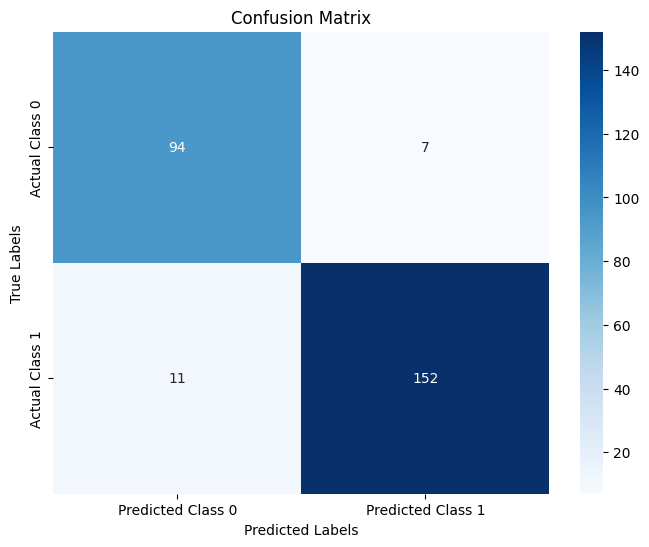

In [24]:
# Print akurasi dan classification report
accuracy = accuracy_score(y_test, y_pred)
y_train_pred = rf_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
accuracy_scores.append(accuracy)
print(f"Train Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Class 0", "Predicted Class 1"],
            yticklabels=["Actual Class 0", "Actual Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## **Model Comparison**

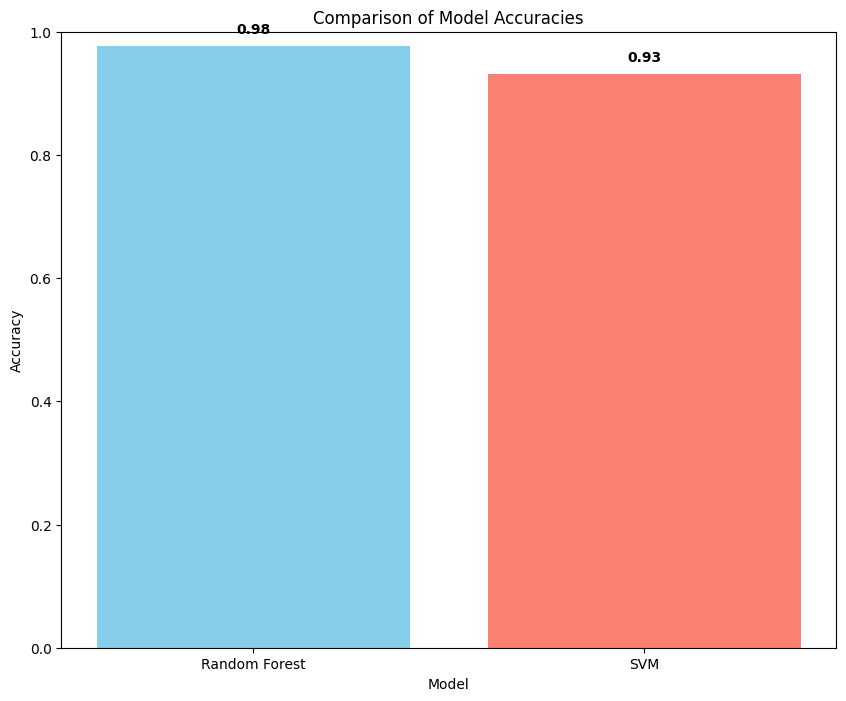

In [25]:
# Visualisasi akurasi model
models = [
    "Random Forest",
    "SVM"
]

plt.figure(figsize=(10, 8))
plt.bar(models, accuracy_scores, color=['skyblue', 'salmon'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Batasi skala akurasi antara 0 hingga 1
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

### **Kesimpulan**

Model Random Forest yang dioptimalkan ini telah berhasil memenuhi tujuan utama proyek, yakni memberikan prediksi risiko penyakit jantung dengan keakuratan yang lebih tinggi dan relevansi klinis yang kuat dibandingkan algoritma SVM dengan perbandingan 98% (RF) dan 93% (SVM).